# **SALES PREDICTION USING PYTHON**

# Sales prediction with Python enables businesses to forecast future sales based on factors like advertising expenses, customer segmentation, and marketing platforms. Leveraging machine learning techniques, companies can analyze historical data, build predictive models, and make data-driven decisions to optimize marketing strategies, allocate resources efficiently, and maximize revenue potential. By continuously updating the models with new data, businesses can adapt to market dynamics and achieve better performance in a competitive environment.

# **Project Work flow**
---

1. **Importing Libraries**

2. **Loading the Dataset**

3. **Exploratory Data Analysis**

4. **Data Wrangling**

5. **Splitting the data and Standardization**

6. **Fitting models**

7. **Model Explainability**

8. **Conclusion**

# **Import necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)
os.getcwd()

'c:\\Users\\sajal\\Desktop\\python code'

# **importing Datasets**

In [4]:


df = pd.read_csv(r"C:\Users\sajal\Downloads\archive (9).zip")

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.shape

(200, 5)

In [10]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [13]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


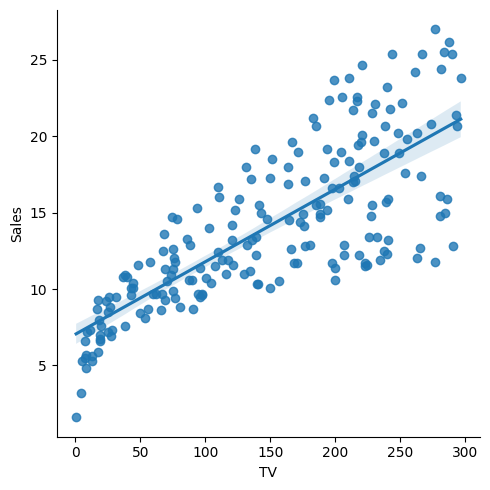

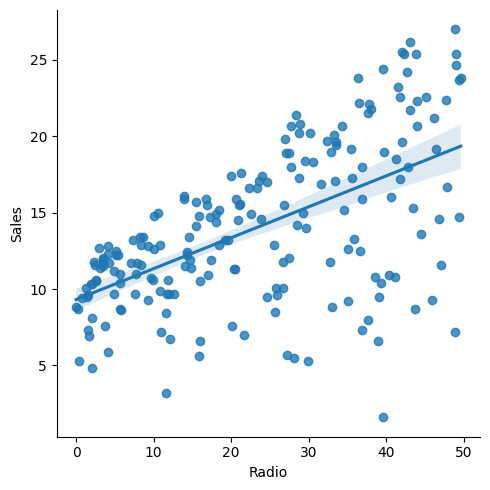

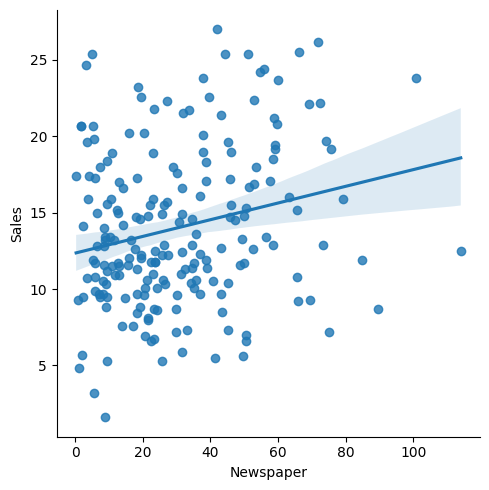

In [14]:
sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper',y= 'Sales', data=df)

In [15]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


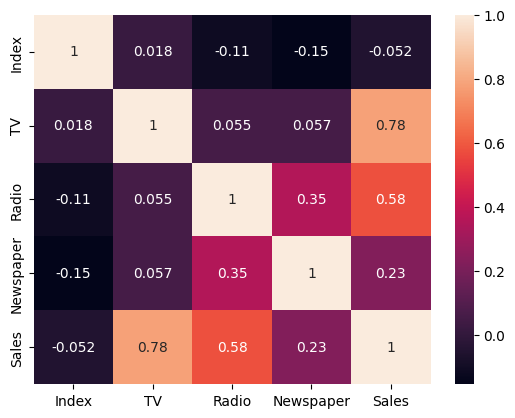

In [19]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:

df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [18]:
df

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [20]:
# Model Preparation

X = df.drop('Sales', axis=1)
y = df[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [23]:
lr.coef_

array([[-0.00098696,  0.04616409,  0.18808776,  0.00264293]])

In [24]:
lr.intercept_

array([2.95181904])

In [25]:
y_pred = lr.predict(X_test)
print(y_pred)

[[15.05284509]
 [15.77508989]
 [13.47904747]
 [ 9.72534111]
 [23.52038068]
 [ 9.66569867]
 [12.19338508]
 [10.00805294]
 [14.49053239]
 [14.95776441]
 [11.95559886]
 [21.20779211]
 [ 3.73757485]
 [17.91913301]
 [15.77254262]
 [ 9.35052927]
 [10.09630485]
 [10.81374377]
 [ 6.14777743]
 [16.41818709]
 [10.0199983 ]
 [16.47905199]
 [ 4.55066048]
 [16.92422061]
 [ 8.77180313]
 [17.39079607]
 [15.06629247]
 [12.74323646]
 [14.47708314]
 [20.83733988]
 [ 8.22143959]
 [16.38190897]
 [18.27445947]
 [13.94713744]
 [17.93078304]
 [14.80582658]
 [14.10945444]
 [17.2097718 ]
 [ 7.14727708]
 [12.65200945]]


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
mse = mean_squared_error(y_test, y_pred)
mse

2.902416880390479

In [28]:
rmse = np.sqrt(mse)
rmse

1.703648109320255

In [29]:
r2s = r2_score(y_test, y_pred)
r2s

0.8503383755246359

# Conclusion

### Thats it! We have come to an end of our long exercise. Throughout the analysis we went through various steps to determine our predictions for the Sales Prediction . We started with simple EDA where we analysed our dependent variable as well as other independent variables. We found out the correlation, count, relationships with the dependent variable. We looked for missing values and outliers and did some feature modifications.

